#### 例子：CRSP 等权指数月度收益率

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = []
with open("../ftsdata/m-ibm3dx2608.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.set_index("date", inplace=True)
data = data.apply(pd.to_numeric)
data.head()

,ibmrtn,vwrtn,ewrtn,sprtn
date,,,,
1926-01-30,-0.010381,0.000724,0.023174,0.022472
1926-02-27,-0.024476,-0.033374,-0.053510,-0.043956
1926-03-31,-0.115591,-0.064341,-0.096824,-0.059113
1926-04-30,0.089783,0.038358,0.032946,0.022688
1926-05-28,0.036932,0.012172,0.001035,0.007679


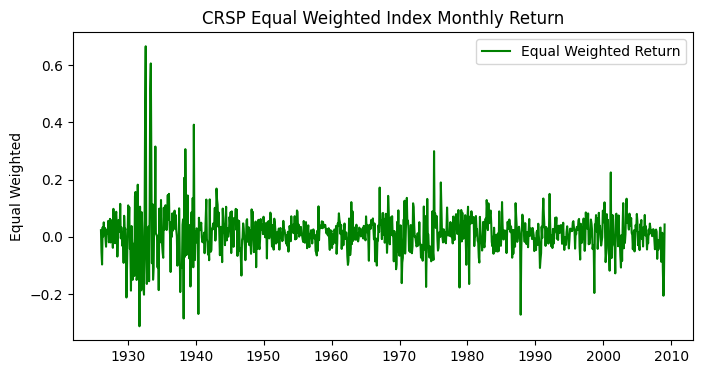

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(data["ewrtn"], label='Equal Weighted Return', color="green")
plt.title('CRSP Equal Weighted Index Monthly Return')
plt.ylabel('Equal Weighted')
plt.legend()
plt.show()

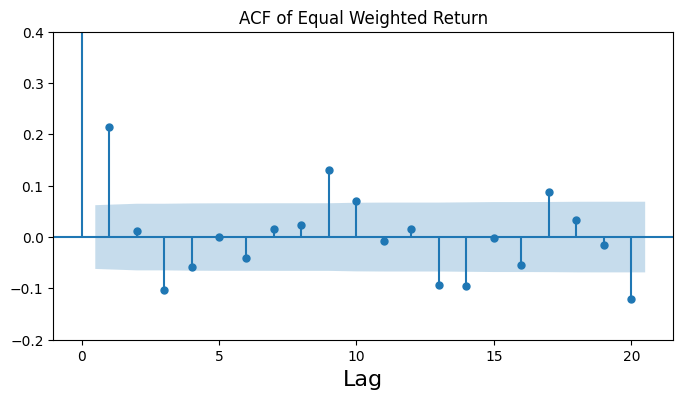

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
ax = plt.gca()  # 获取当前的轴对象
plot_acf(data["ewrtn"], ax=ax, lags=20)
ax.set_ylim(-0.2, 0.4)
ax.set_xlabel('Lag', fontsize=16)  # 设置横轴标签
plt.title('ACF of Equal Weighted Return')
plt.show()